### 머신러닝의 개념
- 애플리케이션을 수정하지 않고도 데이터를 기반으로 패턴을 학습하고 결과를 예측하는 알고리즘 기법을 통칭

### 머신러닝의 분류
- 지도학습 : 분류 / 회귀 / 추천 시스템 / 시각, 음성 감지, 인지 / 텍스트 분석, NLP
- 비지도학습 : 클러스터링 / 차원 축소 / 강화학습

### 파이썬과 R 기반의 머신러닝 비교
- R은 통계 전용 프로그램 언어
- 파이썬은 다양한 영역에서 사용되는 개발 전문 프로그램 언어

### 파이썬 머신러닝 생태계를 구성하는 주요 패키지
- 머신러닝 패키지 : 대표적인 머신러닝 패키지 '사이킷런(Scikit-Learn)'
- 행렬/선형대수/통계 패키지 : 머신러닝의 이론적 백그라운드는 선형대수와 통계로 이뤄져 있다. 파이썬의 대표적인 행렬과 선형대수를 다루는 패키지는 넘파이(Numpy). 사이파이(Scipy)는 자연과학과 통계를 위한 패키지.
- 데이터 핸들링 : 판다스는 파이썬의 대표적인 데이터 처리 패키지. 넘파이는 행렬 기반의 데이터 처리에 특화되어 있다면, 판다스는 2차원 데이터 처리에 특화되어 있다.
- 시각화 : 파이썬의 대표적인 시각화 패키지는 맷플롯립. 맷플롯립의 세분화된 API 등 번거로운 점을 보완한 시본(Seaborn) 패키지. 판다스와 쉬운 연동이 가능하다.
- 이 외 여러 서드파티 라이브러리
- 대화형 파이썬 툴인 주피터 노트북. 전체 프로그램에서 특정 코드 영역별로 개별 수행을 지원.

## 사이킷런으로 머신러닝 구현 - 붓꽃 품종 예측하기
- 데이터 세트 분리 : 학습 데이터 / 테스트 데이터
- 모델 학습 : 학습 데이터 기반으로 머신러닝 알고리즘을 적용해 모델 학습
- 예측 수행 : 학습된 머신러닝 모델을 이용해 테스트 데이터의 분류 예측
- 평가 : 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 머신러닝 모델 성능 평가

In [1]:
from sklearn.datasets import load_iris # 데이터 세트 생성
from sklearn.tree import DecisionTreeClassifier # 트리 기반 머신러닝 알고리즘을 구현한 클래스의 모임
from sklearn.model_selection import train_test_split # 학습 데이터/검증 데이터/예측 데이터로 데이터 분리 or 최적의 하이퍼 파라미터 평가를 위한 다양한 모듈의 모임

- 하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭. 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능 튜닝.

In [2]:
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data 는 Iris 데이터 세트에서 피처만으로 된 데이터를 numpy 로 가지고 있다.
iris_data = iris.data

# iris.target 은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy 로 가지고 있다.
iris_label = iris.target
print('iris target 값 :', iris_label)
print('iris target 명 :', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame 으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

iris target 값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# 학습용 데이터와 테스트용 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(iris_data, iris_label, # (피처 데이터 세트, 레이블 데이터 세트
                                                       test_size=0.2, random_state=11) # 전체 데이터 세트 중 테스트 데이터 세트의 비율, 난수 발생 값)

# random_state 를 동일한 값으로 지정해야 수행할 때마다 동일한 학습/테스트용 데이터를 만든다. 숫자 자체는 어떤 값을 지정해도 상관 X
# X_train -> 학습용 피처 데이터 세트 / X_test -> 테스트용 피처 데이터 세트 
# y_train -> 학습용 레이블 데이터 세트 / y_test -> 테스트용 레이블 데이터 세트


In [4]:
# DecisionTreeClassifier 객체 생성 (학습기 생성)
dt_clf = DecisionTreeClassifier(random_state=11)

In [5]:
# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [6]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test) #predict() 함수에 테스트용 피처 데이터 세트를 입력해 테스트 데이터 세트에 대한 예측값 반환

In [7]:
# 예측 성능 평가 (정확도 측정 : 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지 평가)
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred))) #accuracy_score(실제 레이블 데이터 세트, 예측 레이블 데이터 세트)

예측 정확도: 0.9333


## 사이킷런 기반 프레임워크 익히기

### Estimator 이해 및 fit(), predict() 메서드

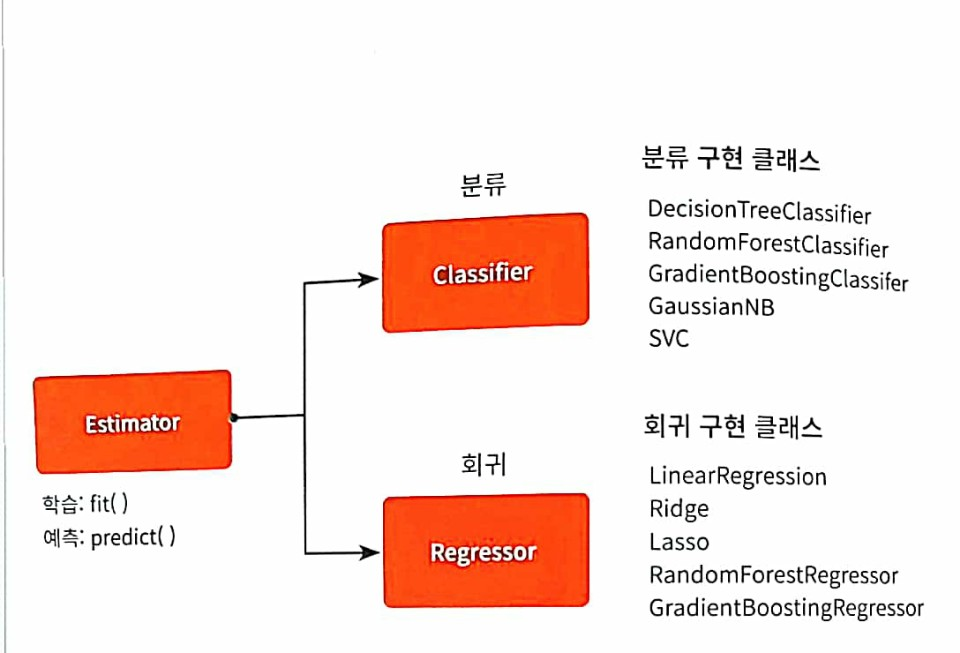

In [4]:
from IPython.display import Image
Image('C:/Users/i/data/Estimator.jpg', width = 600)

- fit() : 머신러닝 모델 학습 함수
- predict() : 학습된 모델의 예측 함수
- cross_val_score() : 평가 함수
- GridSearchCV : 하이퍼 파라미터 튜닝 지원 클래스

- fit() : 지도학습과 달리 비지도학습과 피처 추출에서는 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞춤
- transform() : 입력 데이터 차원 변환, 클러스터링, 피처 추출 등의 실제 작업 수행